In [1]:
from Utils.data_generators import *
from Utils.util_plotting import *
from Utils.util_data_preprocessing import *
package = 'prim'

/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/ema_workbench/em_framework/evaluators.py:59: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_d

experiment 750/750

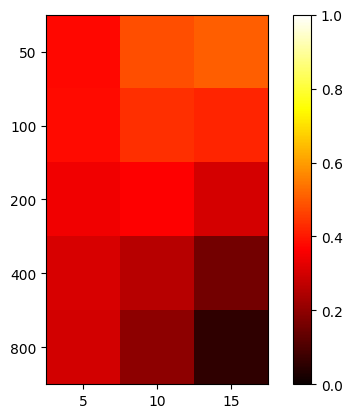

[[0.39341133 0.39772377 0.4264855 ]
 [0.44311018 0.51488415 0.5594945 ]
 [0.52501839 0.61914985 0.68971342]
 [0.56870304 0.73574786 0.84240423]
 [0.62692816 0.79537655 0.94210888]]
[[0.76952414 0.87943823 0.93121911]
 [0.82355944 0.95124009 0.97909091]
 [0.87014286 0.98484848 0.99179487]
 [0.87638462 0.994      1.        ]
 [0.92489044 0.994      0.998     ]]


In [2]:
#whitout preprocessing
create_heatmap_best_box_generated_data_precision(calculate_y_oakley_ohagan2004, 15, package, None, 50)

experiment 1500/1500

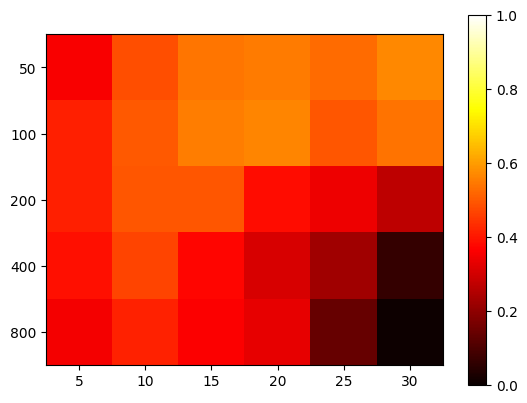

[[0.31505349 0.32102709 0.31951706 0.33798792 0.3259063  0.33330678]
 [0.3540396  0.3769903  0.39786735 0.39772741 0.48970593 0.45030334]
 [0.39363304 0.39693834 0.48588837 0.60867923 0.65713932 0.73205846]
 [0.37869511 0.45535647 0.62007822 0.69351655 0.77599321 0.93435557]
 [0.41516446 0.51635458 0.63524032 0.66789426 0.86126879 0.9931269 ]]
[[0.67427273 0.80217849 0.86083117 0.88766434 0.85040593 0.90238328]
 [0.76528671 0.87503896 0.95128671 0.96205828 0.98452214 0.98607792]
 [0.80749417 0.890099   0.97821212 0.99436364 1.         1.        ]
 [0.76556577 0.92169464 0.99238462 1.         1.         1.        ]
 [0.76388545 0.93049184 0.99636364 0.99833333 1.         1.        ]]


In [3]:
create_heatmap_best_box_generated_data_precision(calculate_y_morris, 30, package, None, 50)

experiment 1000/1000

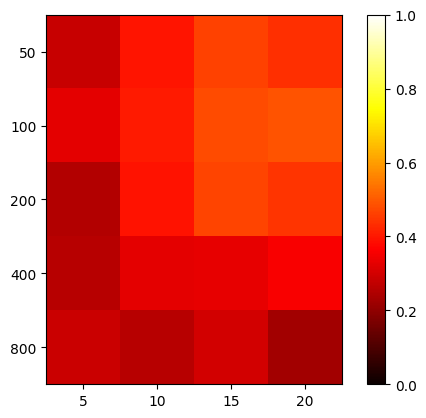

[[0.4155138  0.41116781 0.41622844 0.41671869]
 [0.45327133 0.46415829 0.44648628 0.45315617]
 [0.51729856 0.52522363 0.51642757 0.54255308]
 [0.54179892 0.61587451 0.66214989 0.6412202 ]
 [0.568184   0.69896954 0.69653062 0.77255019]]
[[0.69883217 0.80640693 0.87746154 0.85334266]
 [0.7806014  0.86857343 0.92655478 0.94174126]
 [0.76940793 0.91668065 0.9820373  0.98490909]
 [0.80161305 0.9401292  0.994      0.99818182]
 [0.85336131 0.9570676  0.99436364 1.        ]]


In [4]:
create_heatmap_best_box_generated_data_precision(calculate_y_moon2010, 20, package, None, 50)

experiment 1000/1000

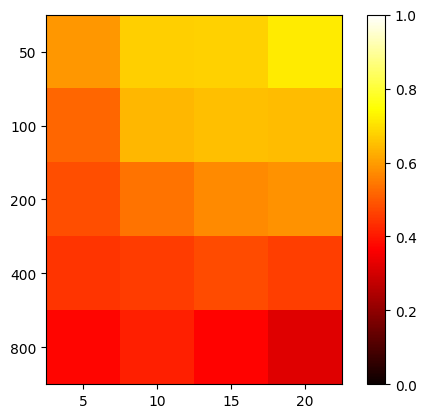

[[0.21462494 0.23679187 0.22696075 0.24043751]
 [0.26133878 0.27126045 0.31169412 0.31211213]
 [0.31856721 0.35481933 0.37619032 0.39398495]
 [0.38114846 0.47903614 0.50511349 0.52973348]
 [0.40004994 0.49362088 0.61714321 0.68029804]]
[[0.80489977 0.90869697 0.90360281 0.95630736]
 [0.78067599 0.90981352 0.96118648 0.96048485]
 [0.80271562 0.89274825 0.94915152 0.97884848]
 [0.82489977 0.93257343 0.98215851 0.98682517]
 [0.77267732 0.90708258 0.98454545 0.998     ]]


In [5]:
create_heatmap_best_box_generated_data_precision(calculate_y_sobol_levitan1999, 20, package, None, 50)

In [ ]:
pts = [50, 100, 200, 400, 800, 1600, 3200, 6400]  # number of points to experiment with
atrs = [5, 10, 15, 18]  # number of dimensions to experiment with
res_train = np.empty((len(pts), len(atrs)))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty((len(pts), len(atrs)))  # matrix with the results
res_test[:] = np.nan
k = 1
data = get_data('susy')

for n in range(len(pts)):
    for m in range(len(atrs)):
        prec_train = []
        prec_test = []
        for i in range(50):  # for each dataset size (n rows, m columns) do five experiments and average the results
            sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)*len(atrs)))
            
            num_columns_to_select = atrs[m]  # Change this to the number of columns you need
            label_column = None
            
            data_temp = data.copy()
            label_column = data_temp['label']
            data_temp.drop('label', axis=1, inplace=True)

                # Select random columns
            selected_columns = random.sample(list(data_temp.columns), num_columns_to_select)

                # Create a new DataFrame with the selected columns
            data_temp = data_temp[selected_columns]
            data_temp.insert(loc=0, column='label', value=label_column)
            
                #sampeling a subset of the whole data set
            sample_train, sample_test = train_test_split(data_temp, test_size=pts[n], train_size=pts[n]*2, stratify=data_temp['label'])
        
            sample_train = pd.DataFrame(data=sample_train.values, columns=sample_train.columns)
            sample_test = pd.DataFrame(data=sample_test.values, columns=sample_test.columns)

            y = sample_train['label'].values
            sample_train.drop('label', axis=1, inplace=True)
            x = sample_train.values
            
            y_test = sample_test['label']
            sample_test.drop('label', axis=1, inplace=True)
            x_test = sample_test.values
            
            prim_alg = prim_dens.PRIMdens(x, y, alpha=0.1)
            prim_alg.fit()
            precisions = prim_alg.get_precisions()
            if len(precisions) <= 0:
                prec_train.append(0)
            else:
                prec_train.append(precisions[len(precisions)-1])
            boxes = prim_alg.get_boxes()
            if len(boxes) <= 0:
                prec_test.append(0)
            else:
                box = boxes[len(boxes) - 1]
                box = pd.DataFrame(box)
                prec_test.append(calculate_precision_test_data_onebox(box, x_test, y_test))           
        
        res_train[n, m] = np.mean(prec_train)
        res_test[n, m] = np.mean(prec_test) 
        k = k + 1

plt.imshow(res_train-res_test, cmap='hot')
plt.yticks(np.arange(len(pts)), pts)
plt.xticks(np.arange(len(atrs)), atrs)
plt.colorbar()
plt.show()

In [ ]:
pts = [50, 100, 200, 400, 800, 1600, 3200, 6400]  # number of points to experiment with
atrs = [5, 10, 15, 18]  # number of dimensions to experiment with
res_train = np.empty((len(pts), len(atrs)))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty((len(pts), len(atrs)))  # matrix with the results
res_test[:] = np.nan
k = 1
data = get_data('higgs')

for n in range(len(pts)):
    for m in range(len(atrs)):
        prec_train = []
        prec_test = []
        for i in range(50):  # for each dataset size (n rows, m columns) do five experiments and average the results
            sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts) * len(atrs)))

            num_columns_to_select = atrs[m]  # Change this to the number of columns you need
            label_column = None

            data_temp = data.copy()
            label_column = data_temp['label']
            data_temp.drop('label', axis=1, inplace=True)

            # Select random columns
            selected_columns = random.sample(list(data_temp.columns), num_columns_to_select)

            # Create a new DataFrame with the selected columns
            data_temp = data_temp[selected_columns]
            data_temp.insert(loc=0, column='label', value=label_column)

            #sampeling a subset of the whole data set
            sample_train, sample_test = train_test_split(data_temp, test_size=pts[n], train_size=pts[n] * 2, stratify=data_temp['label'])

            sample_train = pd.DataFrame(data=sample_train.values, columns=sample_train.columns)
            sample_test = pd.DataFrame(data=sample_test.values, columns=sample_test.columns)

            y = sample_train['label'].values
            sample_train.drop('label', axis=1, inplace=True)
            x = sample_train.values

            y_test = sample_test['label']
            sample_test.drop('label', axis=1, inplace=True)
            x_test = sample_test.values

            prim_alg = prim_dens.PRIMdens(x, y, alpha=0.1)
            prim_alg.fit()
            precisions = prim_alg.get_precisions()
            if len(precisions) <= 0:
                prec_train.append(0)
            else:
                prec_train.append(precisions[len(precisions) - 1])
            boxes = prim_alg.get_boxes()
            if len(boxes) <= 0:
                prec_test.append(0)
            else:
                box = boxes[len(boxes) - 1]
                box = pd.DataFrame(box)
                prec_test.append(calculate_precision_test_data_onebox(box, x_test, y_test))

        res_train[n, m] = np.mean(prec_train)
        res_test[n, m] = np.mean(prec_test)
        k = k + 1

plt.imshow(res_train - res_test, cmap='hot')
plt.yticks(np.arange(len(pts)), pts)
plt.xticks(np.arange(len(atrs)), atrs)
plt.colorbar()
plt.show()